In [1]:
import pandas as pd
pd.set_option("display.max_columns",999) # display all columns

from pymatgen.analysis.local_env import BrunnerNN_reciprocal, BrunnerNN_relative, BrunnerNN_real, EconNN, JMolNN, \
                                        MinimumDistanceNN, MinimumOKeeffeNN, MinimumVIRENN, \
                                        VoronoiNN, VoronoiNN_modified, CrystalNN
from materialscoord.core import Benchmark, HumanInterpreter

methods = [BrunnerNN_reciprocal(), BrunnerNN_relative(), BrunnerNN_real(), EconNN(), JMolNN(),
           MinimumDistanceNN(), MinimumOKeeffeNN(), MinimumVIRENN(), VoronoiNN(), VoronoiNN_modified(),
           HumanInterpreter(cations=True), CrystalNN()]

#structure_groups = ["common_binaries", "zeolites", "mixed", "elemental"] 

structure_groups = ["common_binaries"]

unique_sites = 4

algo = ["BrunnerNN_reciprocal", "BrunnerNN_relative", "BrunnerNN_real", "CrystalNN", "EconNN", "JMolNN",
        "MinimumDistanceNN", "MinimumOKeeffeNN", "MinimumVIRENN", "VoronoiNN", "VoronoiNN_modified"]

In [2]:
uw_bm = Benchmark(methods=methods, structure_groups=structure_groups, unique_sites=True,
                  use_weights=False, cations=True)
uw_bm.benchmark()

uw = uw_bm.report(totals=False, separate_columns=True, max_sites=unique_sites)
uw

Initialization successful.


,BrunnerNN_real0,BrunnerNN_real1,BrunnerNN_real2,BrunnerNN_real3,BrunnerNN_reciprocal0,BrunnerNN_reciprocal1,BrunnerNN_reciprocal2,BrunnerNN_reciprocal3,BrunnerNN_relative0,BrunnerNN_relative1,BrunnerNN_relative2,BrunnerNN_relative3,CrystalNN0,CrystalNN1,CrystalNN2,CrystalNN3,EconNN0,EconNN1,EconNN2,EconNN3,HumanInterpreter0,HumanInterpreter1,HumanInterpreter2,HumanInterpreter3,JMolNN0,JMolNN1,JMolNN2,JMolNN3,MinimumDistanceNN0,MinimumDistanceNN1,MinimumDistanceNN2,MinimumDistanceNN3,MinimumOKeeffeNN0,MinimumOKeeffeNN1,MinimumOKeeffeNN2,MinimumOKeeffeNN3,MinimumVIRENN0,MinimumVIRENN1,MinimumVIRENN2,MinimumVIRENN3,VoronoiNN0,VoronoiNN1,VoronoiNN2,VoronoiNN3,VoronoiNN_modified0,VoronoiNN_modified1,VoronoiNN_modified2,VoronoiNN_modified3
Al2O3_corundum,{'O': 12},{'O': 32},{},{},{'O': 6},{},{},{},{'O': 12},{'O': 32},{},{},{'O': 6},{},{},{},{'O': 6},{'O': 8},{},{},{'O': 6.0},{'O': 0.0},{},{},{'O': 6},{},{},{},{'O': 6},{},{},{},{'O': 6},{},{},{},{'O2-': 6},"{'Al3+': 4, 'O2-': 4}",{},{},{'O': 12},{'O': 12},{},{},{'O': 6},{},{},{}
CaF2_fluorite,{'F': 8},{'F': 6},{},{},{'F': 8},{'F': 6},{},{},{'F': 8},{'F': 6},{},{},{'F': 8},{},{},{},{'F': 8},{'F': 6},{},{},{'F': 8.0},{'F': 0.0},{},{},{},{},{},{},{'F': 8},{},{},{},{'F': 8},{},{},{},{'F-': 8},{'Ca2+': 4},{},{},{'F': 8},{'F': 13},{},{},{'F': 8},{'F': 6},{},{}
ZnS_zincblende,{'S': 4},{},{},{},{'S': 4},{},{},{},{'S': 4},{},{},{},{'S': 4},{},{},{},{'S': 4},{},{},{},{'S': 4.0},{'S': 0.0},{},{},{'S': 4},{},{},{},{'S': 4},{},{},{},{'S': 4},{},{},{},{'S2-': 4},{'Zn2+': 4},{},{},{'S': 7},{'S': 12},{},{},{'S': 4},{},{},{}
CsCl,{'Cl': 8},{},{},{},{'Cl': 8},{'Cl': 6},{},{},{'Cl': 8},{},{},{},{'Cl': 8},{},{},{},{'Cl': 8},{'Cl': 6},{},{},{'Cl': 8.0},{'Cl': 0.0},{},{},{},{},{},{},{'Cl': 8},{},{},{},{},{},{},{},"{'Cs+': 6, 'Cl-': 8}",{'Cs+': 8},{},{},{'Cl': 8},{'Cl': 6},{},{},{'Cl': 8},{},{},{}
NaCl_rocksalt,{'Cl': 6},{},{},{},{'Cl': 6},{},{},{},{'Cl': 6},{},{},{},{'Cl': 6},{},{},{},{'Cl': 6},{'Cl': 12},{},{},{'Cl': 6.0},{'Cl': 0.0},{},{},{},{},{},{},{'Cl': 6},{},{},{},{'Cl': 6},{},{},{},{'Cl-': 6},{'Na+': 6},{},{},{'Cl': 8},{'Cl': 6},{},{},{'Cl': 6},{},{},{}
MgAl2O4_spinel,{'O': 40},{'O': 6},{'O': 3},{},{'O': 4},{'O': 6},{},{},{'O': 40},{'O': 6},{'O': 3},{},{'O': 4},{'O': 6},{},{},{'O': 4},{'O': 6},{'O': 3},{},{'O': 4.0},{'O': 6.0},{'O': 0.0},{},{'O': 4},{'O': 6},{},{},{'O': 4},{'O': 6},{},{},{'O': 4},{'O': 6},{},{},{'O2-': 4},{'O2-': 6},{'Mg2+': 1},{},{'O': 16},{'O': 6},{'O': 12},{},{'O': 4},{'O': 6},{},{}
TiO2_anatase,{'O': 6},{'O': 16},{},{},{'O': 6},{},{},{},{'O': 6},{'O': 16},{},{},{'O': 6},{},{},{},{'O': 6},{'O': 6},{},{},{'O': 6.0},{'O': 0.0},{},{},{'O': 6},{},{},{},{'O': 6},{},{},{},{'O': 6},{},{},{},{'O2-': 6},"{'Ti4+': 3, 'O2-': 2}",{},{},{'O': 6},{'O': 14},{},{},{'O': 6},{},{},{}
ZnS_wurtzite,{'S': 4},{},{},{},{'S': 4},{},{},{},{'S': 4},{},{},{},{'S': 4},{},{},{},{'S': 4},{},{},{},{'S': 4.0},{'S': 0.0},{},{},{'S': 4},{},{},{},{'S': 4},{},{},{},{'S': 4},{},{},{},{'S2-': 4},{'Zn2+': 4},{},{},{'S': 5},{'S': 6},{},{},{'S': 4},{},{},{}
Fe3O4_spinel,{'O': 6},{'O': 4},{},{},{'O': 6},{'O': 4},{},{},{'O': 6},{'O': 4},{},{},{'O': 6},{'O': 4},{},{},{'O': 6},{'O': 4},{'O': 3},{},{'O': 6.0},{'O': 4.0},{'O': 0.0},{},{'O': 6},{'O': 4},{},{},{'O': 6},{'O': 4},{},{},{'O': 6},{'O': 4},{},{},{'O2-': 6},{'O2-': 4},{'Fe2+': 1},{},{'O': 6},{'O': 16},{'O': 12},{},{'O': 6},{'O': 4},{},{}


In [3]:
from materialscoord.nb_funcs import nb_funcs # used to calculate algo accuracy scores
nbf_uw = nb_funcs(uw, algo, unique_sites=unique_sites, cations=True)

In [4]:
# take out MinimumVIRENN oxidation states e.g. 'O2-' and 'F-'
mv_uw = nbf_uw.mv_df()
mv_uw

,BrunnerNN_real0,BrunnerNN_real1,BrunnerNN_real2,BrunnerNN_real3,BrunnerNN_reciprocal0,BrunnerNN_reciprocal1,BrunnerNN_reciprocal2,BrunnerNN_reciprocal3,BrunnerNN_relative0,BrunnerNN_relative1,BrunnerNN_relative2,BrunnerNN_relative3,CrystalNN0,CrystalNN1,CrystalNN2,CrystalNN3,EconNN0,EconNN1,EconNN2,EconNN3,HumanInterpreter0,HumanInterpreter1,HumanInterpreter2,HumanInterpreter3,JMolNN0,JMolNN1,JMolNN2,JMolNN3,MinimumDistanceNN0,MinimumDistanceNN1,MinimumDistanceNN2,MinimumDistanceNN3,MinimumOKeeffeNN0,MinimumOKeeffeNN1,MinimumOKeeffeNN2,MinimumOKeeffeNN3,MinimumVIRENN0,MinimumVIRENN1,MinimumVIRENN2,MinimumVIRENN3,VoronoiNN0,VoronoiNN1,VoronoiNN2,VoronoiNN3,VoronoiNN_modified0,VoronoiNN_modified1,VoronoiNN_modified2,VoronoiNN_modified3
Al2O3_corundum,{'O': 12},{'O': 32},{},{},{'O': 6},{},{},{},{'O': 12},{'O': 32},{},{},{'O': 6},{},{},{},{'O': 6},{'O': 8},{},{},{'O': 6.0},{'O': 0.0},{},{},{'O': 6},{},{},{},{'O': 6},{},{},{},{'O': 6},{},{},{},{'O': 6},"{'Al': 4, 'O': 4}",{},{},{'O': 12},{'O': 12},{},{},{'O': 6},{},{},{}
CaF2_fluorite,{'F': 8},{'F': 6},{},{},{'F': 8},{'F': 6},{},{},{'F': 8},{'F': 6},{},{},{'F': 8},{},{},{},{'F': 8},{'F': 6},{},{},{'F': 8.0},{'F': 0.0},{},{},{},{},{},{},{'F': 8},{},{},{},{'F': 8},{},{},{},{'F': 8},{'Ca': 4},{},{},{'F': 8},{'F': 13},{},{},{'F': 8},{'F': 6},{},{}
ZnS_zincblende,{'S': 4},{},{},{},{'S': 4},{},{},{},{'S': 4},{},{},{},{'S': 4},{},{},{},{'S': 4},{},{},{},{'S': 4.0},{'S': 0.0},{},{},{'S': 4},{},{},{},{'S': 4},{},{},{},{'S': 4},{},{},{},{'S': 4},{'Zn': 4},{},{},{'S': 7},{'S': 12},{},{},{'S': 4},{},{},{}
CsCl,{'Cl': 8},{},{},{},{'Cl': 8},{'Cl': 6},{},{},{'Cl': 8},{},{},{},{'Cl': 8},{},{},{},{'Cl': 8},{'Cl': 6},{},{},{'Cl': 8.0},{'Cl': 0.0},{},{},{},{},{},{},{'Cl': 8},{},{},{},{},{},{},{},"{'Cs': 6, 'Cl': 8}",{'Cs': 8},{},{},{'Cl': 8},{'Cl': 6},{},{},{'Cl': 8},{},{},{}
NaCl_rocksalt,{'Cl': 6},{},{},{},{'Cl': 6},{},{},{},{'Cl': 6},{},{},{},{'Cl': 6},{},{},{},{'Cl': 6},{'Cl': 12},{},{},{'Cl': 6.0},{'Cl': 0.0},{},{},{},{},{},{},{'Cl': 6},{},{},{},{'Cl': 6},{},{},{},{'Cl': 6},{'Na': 6},{},{},{'Cl': 8},{'Cl': 6},{},{},{'Cl': 6},{},{},{}
MgAl2O4_spinel,{'O': 40},{'O': 6},{'O': 3},{},{'O': 4},{'O': 6},{},{},{'O': 40},{'O': 6},{'O': 3},{},{'O': 4},{'O': 6},{},{},{'O': 4},{'O': 6},{'O': 3},{},{'O': 4.0},{'O': 6.0},{'O': 0.0},{},{'O': 4},{'O': 6},{},{},{'O': 4},{'O': 6},{},{},{'O': 4},{'O': 6},{},{},{'O': 4},{'O': 6},{'Mg': 1},{},{'O': 16},{'O': 6},{'O': 12},{},{'O': 4},{'O': 6},{},{}
TiO2_anatase,{'O': 6},{'O': 16},{},{},{'O': 6},{},{},{},{'O': 6},{'O': 16},{},{},{'O': 6},{},{},{},{'O': 6},{'O': 6},{},{},{'O': 6.0},{'O': 0.0},{},{},{'O': 6},{},{},{},{'O': 6},{},{},{},{'O': 6},{},{},{},{'O': 6},"{'Ti': 3, 'O': 2}",{},{},{'O': 6},{'O': 14},{},{},{'O': 6},{},{},{}
ZnS_wurtzite,{'S': 4},{},{},{},{'S': 4},{},{},{},{'S': 4},{},{},{},{'S': 4},{},{},{},{'S': 4},{},{},{},{'S': 4.0},{'S': 0.0},{},{},{'S': 4},{},{},{},{'S': 4},{},{},{},{'S': 4},{},{},{},{'S': 4},{'Zn': 4},{},{},{'S': 5},{'S': 6},{},{},{'S': 4},{},{},{}
Fe3O4_spinel,{'O': 6},{'O': 4},{},{},{'O': 6},{'O': 4},{},{},{'O': 6},{'O': 4},{},{},{'O': 6},{'O': 4},{},{},{'O': 6},{'O': 4},{'O': 3},{},{'O': 6.0},{'O': 4.0},{'O': 0.0},{},{'O': 6},{'O': 4},{},{},{'O': 6},{'O': 4},{},{},{'O': 6},{'O': 4},{},{},{'O': 6},{'O': 4},{'Fe': 1},{},{'O': 6},{'O': 16},{'O': 12},{},{'O': 6},{'O': 4},{},{}


In [5]:
# subtract human interpreted value from algo-calculated value
sub_uw = nbf_uw.sub_hi()
sub_uw

,BrunnerNN_real0,BrunnerNN_real1,BrunnerNN_real2,BrunnerNN_real3,BrunnerNN_reciprocal0,BrunnerNN_reciprocal1,BrunnerNN_reciprocal2,BrunnerNN_reciprocal3,BrunnerNN_relative0,BrunnerNN_relative1,BrunnerNN_relative2,BrunnerNN_relative3,CrystalNN0,CrystalNN1,CrystalNN2,CrystalNN3,EconNN0,EconNN1,EconNN2,EconNN3,JMolNN0,JMolNN1,JMolNN2,JMolNN3,MinimumDistanceNN0,MinimumDistanceNN1,MinimumDistanceNN2,MinimumDistanceNN3,MinimumOKeeffeNN0,MinimumOKeeffeNN1,MinimumOKeeffeNN2,MinimumOKeeffeNN3,MinimumVIRENN0,MinimumVIRENN1,MinimumVIRENN2,MinimumVIRENN3,VoronoiNN0,VoronoiNN1,VoronoiNN2,VoronoiNN3,VoronoiNN_modified0,VoronoiNN_modified1,VoronoiNN_modified2,VoronoiNN_modified3
Al2O3_corundum,{'O': 6.0},{'O': 32.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 6.0},{'O': 32.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 0.0},{'O': 8.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 0.0},"{'Al': 4, 'O': 4.0}",{},{},{'O': 6.0},{'O': 12.0},{},{},{'O': 0.0},{'O': 0.0},{},{}
CaF2_fluorite,{'F': 0.0},{'F': 6.0},{},{},{'F': 0.0},{'F': 6.0},{},{},{'F': 0.0},{'F': 6.0},{},{},{'F': 0.0},{'F': 0.0},{},{},{'F': 0.0},{'F': 6.0},{},{},{'F': -8.0},{'F': 0.0},{},{},{'F': 0.0},{'F': 0.0},{},{},{'F': 0.0},{'F': 0.0},{},{},{'F': 0.0},"{'Ca': 4, 'F': 0.0}",{},{},{'F': 0.0},{'F': 13.0},{},{},{'F': 0.0},{'F': 6.0},{},{}
ZnS_zincblende,{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},"{'Zn': 4, 'S': 0.0}",{},{},{'S': 3.0},{'S': 12.0},{},{},{'S': 0.0},{'S': 0.0},{},{}
CsCl,{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 6.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 6.0},{},{},{'Cl': -8.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': -8.0},{'Cl': 0.0},{},{},"{'Cs': 6, 'Cl': 0.0}","{'Cs': 8, 'Cl': 0.0}",{},{},{'Cl': 0.0},{'Cl': 6.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{}
NaCl_rocksalt,{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 12.0},{},{},{'Cl': -6.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': 0.0},"{'Na': 6, 'Cl': 0.0}",{},{},{'Cl': 2.0},{'Cl': 6.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{}
MgAl2O4_spinel,{'O': 36.0},{'O': 0.0},{'O': 3.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 36.0},{'O': 0.0},{'O': 3.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},{'O': 3.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},"{'Mg': 1, 'O': 0.0}",{},{'O': 12.0},{'O': 0.0},{'O': 12.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{}
TiO2_anatase,{'O': 0.0},{'O': 16.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 0.0},{'O': 16.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 0.0},{'O': 6.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 0.0},"{'Ti': 3, 'O': 2.0}",{},{},{'O': 0.0},{'O': 14.0},{},{},{'O': 0.0},{'O': 0.0},{},{}
ZnS_wurtzite,{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},"{'Zn': 4, 'S': 0.0}",{},{},{'S': 1.0},{'S': 6.0},{},{},{'S': 0.0},{'S': 0.0},{},{}
Fe3O4_spinel,{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},{'O': 3.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},"{'Fe': 1, 'O': 0.0}",{},{'O': 0.0},{'O': 12.0},{'O': 12.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{}


In [6]:
# take abs value of difference
abs_uw = nbf_uw.abs_df()
abs_uw

,BrunnerNN_real0,BrunnerNN_real1,BrunnerNN_real2,BrunnerNN_real3,BrunnerNN_reciprocal0,BrunnerNN_reciprocal1,BrunnerNN_reciprocal2,BrunnerNN_reciprocal3,BrunnerNN_relative0,BrunnerNN_relative1,BrunnerNN_relative2,BrunnerNN_relative3,CrystalNN0,CrystalNN1,CrystalNN2,CrystalNN3,EconNN0,EconNN1,EconNN2,EconNN3,JMolNN0,JMolNN1,JMolNN2,JMolNN3,MinimumDistanceNN0,MinimumDistanceNN1,MinimumDistanceNN2,MinimumDistanceNN3,MinimumOKeeffeNN0,MinimumOKeeffeNN1,MinimumOKeeffeNN2,MinimumOKeeffeNN3,MinimumVIRENN0,MinimumVIRENN1,MinimumVIRENN2,MinimumVIRENN3,VoronoiNN0,VoronoiNN1,VoronoiNN2,VoronoiNN3,VoronoiNN_modified0,VoronoiNN_modified1,VoronoiNN_modified2,VoronoiNN_modified3
Al2O3_corundum,{'O': 6.0},{'O': 32.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 6.0},{'O': 32.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 0.0},{'O': 8.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 0.0},"{'Al': 4, 'O': 4.0}",{},{},{'O': 6.0},{'O': 12.0},{},{},{'O': 0.0},{'O': 0.0},{},{}
CaF2_fluorite,{'F': 0.0},{'F': 6.0},{},{},{'F': 0.0},{'F': 6.0},{},{},{'F': 0.0},{'F': 6.0},{},{},{'F': 0.0},{'F': 0.0},{},{},{'F': 0.0},{'F': 6.0},{},{},{'F': 8.0},{'F': 0.0},{},{},{'F': 0.0},{'F': 0.0},{},{},{'F': 0.0},{'F': 0.0},{},{},{'F': 0.0},"{'Ca': 4, 'F': 0.0}",{},{},{'F': 0.0},{'F': 13.0},{},{},{'F': 0.0},{'F': 6.0},{},{}
ZnS_zincblende,{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},"{'Zn': 4, 'S': 0.0}",{},{},{'S': 3.0},{'S': 12.0},{},{},{'S': 0.0},{'S': 0.0},{},{}
CsCl,{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 6.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 6.0},{},{},{'Cl': 8.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': 8.0},{'Cl': 0.0},{},{},"{'Cs': 6, 'Cl': 0.0}","{'Cs': 8, 'Cl': 0.0}",{},{},{'Cl': 0.0},{'Cl': 6.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{}
NaCl_rocksalt,{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 12.0},{},{},{'Cl': 6.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': 0.0},"{'Na': 6, 'Cl': 0.0}",{},{},{'Cl': 2.0},{'Cl': 6.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{}
MgAl2O4_spinel,{'O': 36.0},{'O': 0.0},{'O': 3.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 36.0},{'O': 0.0},{'O': 3.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},{'O': 3.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},"{'Mg': 1, 'O': 0.0}",{},{'O': 12.0},{'O': 0.0},{'O': 12.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{}
TiO2_anatase,{'O': 0.0},{'O': 16.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 0.0},{'O': 16.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 0.0},{'O': 6.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 0.0},"{'Ti': 3, 'O': 2.0}",{},{},{'O': 0.0},{'O': 14.0},{},{},{'O': 0.0},{'O': 0.0},{},{}
ZnS_wurtzite,{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},"{'Zn': 4, 'S': 0.0}",{},{},{'S': 1.0},{'S': 6.0},{},{},{'S': 0.0},{'S': 0.0},{},{}
Fe3O4_spinel,{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},{'O': 3.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},"{'Fe': 1, 'O': 0.0}",{},{'O': 0.0},{'O': 12.0},{'O': 12.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{}


In [7]:
# adds two new columns
# df['num equiv site atoms'] (list): of how many equivalent sites there are for particular unique site
# df['num unit cell atoms'] (int): number of cations in unit cell
cs_uw = nbf_uw.cif_stats()
cs_uw

,BrunnerNN_real0,BrunnerNN_real1,BrunnerNN_real2,BrunnerNN_real3,BrunnerNN_reciprocal0,BrunnerNN_reciprocal1,BrunnerNN_reciprocal2,BrunnerNN_reciprocal3,BrunnerNN_relative0,BrunnerNN_relative1,BrunnerNN_relative2,BrunnerNN_relative3,CrystalNN0,CrystalNN1,CrystalNN2,CrystalNN3,EconNN0,EconNN1,EconNN2,EconNN3,JMolNN0,JMolNN1,JMolNN2,JMolNN3,MinimumDistanceNN0,MinimumDistanceNN1,MinimumDistanceNN2,MinimumDistanceNN3,MinimumOKeeffeNN0,MinimumOKeeffeNN1,MinimumOKeeffeNN2,MinimumOKeeffeNN3,MinimumVIRENN0,MinimumVIRENN1,MinimumVIRENN2,MinimumVIRENN3,VoronoiNN0,VoronoiNN1,VoronoiNN2,VoronoiNN3,VoronoiNN_modified0,VoronoiNN_modified1,VoronoiNN_modified2,VoronoiNN_modified3,num equiv site atoms,num cations
Al2O3_corundum,{'O': 6.0},{'O': 32.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 6.0},{'O': 32.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 0.0},{'O': 8.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 0.0},"{'Al': 4, 'O': 4.0}",{},{},{'O': 6.0},{'O': 12.0},{},{},{'O': 0.0},{'O': 0.0},{},{},"[4, 6, 0, 0]",6
CaF2_fluorite,{'F': 0.0},{'F': 6.0},{},{},{'F': 0.0},{'F': 6.0},{},{},{'F': 0.0},{'F': 6.0},{},{},{'F': 0.0},{'F': 0.0},{},{},{'F': 0.0},{'F': 6.0},{},{},{'F': 8.0},{'F': 0.0},{},{},{'F': 0.0},{'F': 0.0},{},{},{'F': 0.0},{'F': 0.0},{},{},{'F': 0.0},"{'Ca': 4, 'F': 0.0}",{},{},{'F': 0.0},{'F': 13.0},{},{},{'F': 0.0},{'F': 6.0},{},{},"[1, 2, 0, 0]",2
ZnS_zincblende,{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},"{'Zn': 4, 'S': 0.0}",{},{},{'S': 3.0},{'S': 12.0},{},{},{'S': 0.0},{'S': 0.0},{},{},"[1, 1, 0, 0]",1
CsCl,{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 6.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 6.0},{},{},{'Cl': 8.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': 8.0},{'Cl': 0.0},{},{},"{'Cs': 6, 'Cl': 0.0}","{'Cs': 8, 'Cl': 0.0}",{},{},{'Cl': 0.0},{'Cl': 6.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{},"[1, 1, 0, 0]",1
NaCl_rocksalt,{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 12.0},{},{},{'Cl': 6.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{},{'Cl': 0.0},"{'Na': 6, 'Cl': 0.0}",{},{},{'Cl': 2.0},{'Cl': 6.0},{},{},{'Cl': 0.0},{'Cl': 0.0},{},{},"[1, 1, 0, 0]",1
MgAl2O4_spinel,{'O': 36.0},{'O': 0.0},{'O': 3.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 36.0},{'O': 0.0},{'O': 3.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},{'O': 3.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},"{'Mg': 1, 'O': 0.0}",{},{'O': 12.0},{'O': 0.0},{'O': 12.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},"[2, 4, 8, 0]",8
TiO2_anatase,{'O': 0.0},{'O': 16.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 0.0},{'O': 16.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 0.0},{'O': 6.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 0.0},{'O': 0.0},{},{},{'O': 0.0},"{'Ti': 3, 'O': 2.0}",{},{},{'O': 0.0},{'O': 14.0},{},{},{'O': 0.0},{'O': 0.0},{},{},"[2, 4, 0, 0]",4
ZnS_wurtzite,{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},{'S': 0.0},{},{},{'S': 0.0},"{'Zn': 4, 'S': 0.0}",{},{},{'S': 1.0},{'S': 6.0},{},{},{'S': 0.0},{'S': 0.0},{},{},"[2, 2, 0, 0]",2
Fe3O4_spinel,{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},{'O': 3.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},{'O': 0.0},{},{'O': 0.0},{'O': 0.0},"{'Fe': 1, 'O': 0.0}",{

In [8]:
me_df = nbf_uw.mult_equiv()
me_df

,BrunnerNN_real0,BrunnerNN_real1,BrunnerNN_real2,BrunnerNN_real3,BrunnerNN_reciprocal0,BrunnerNN_reciprocal1,BrunnerNN_reciprocal2,BrunnerNN_reciprocal3,BrunnerNN_relative0,BrunnerNN_relative1,BrunnerNN_relative2,BrunnerNN_relative3,CrystalNN0,CrystalNN1,CrystalNN2,CrystalNN3,EconNN0,EconNN1,EconNN2,EconNN3,JMolNN0,JMolNN1,JMolNN2,JMolNN3,MinimumDistanceNN0,MinimumDistanceNN1,MinimumDistanceNN2,MinimumDistanceNN3,MinimumOKeeffeNN0,MinimumOKeeffeNN1,MinimumOKeeffeNN2,MinimumOKeeffeNN3,MinimumVIRENN0,MinimumVIRENN1,MinimumVIRENN2,MinimumVIRENN3,VoronoiNN0,VoronoiNN1,VoronoiNN2,VoronoiNN3,VoronoiNN_modified0,VoronoiNN_modified1,VoronoiNN_modified2,VoronoiNN_modified3,num equiv site atoms,num cations
Al2O3_corundum,"{'O': [6.0, 6.0, 6.0, 6.0]}","{'O': [32.0, 32.0, 32.0, 32.0, 32.0, 32.0]}",{},{},"{'O': [0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}",{},{},"{'O': [6.0, 6.0, 6.0, 6.0]}","{'O': [32.0, 32.0, 32.0, 32.0, 32.0, 32.0]}",{},{},"{'O': [0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}",{},{},"{'O': [0.0, 0.0, 0.0, 0.0]}","{'O': [8.0, 8.0, 8.0, 8.0, 8.0, 8.0]}",{},{},"{'O': [0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}",{},{},"{'O': [0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}",{},{},"{'O': [0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}",{},{},"{'O': [0.0, 0.0, 0.0, 0.0]}","{'Al': [4, 4, 4, 4, 4, 4], 'O': [4.0, 4.0, 4.0...",{},{},"{'O': [6.0, 6.0, 6.0, 6.0]}","{'O': [12.0, 12.0, 12.0, 12.0, 12.0, 12.0]}",{},{},"{'O': [0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}",{},{},"[4, 6, 0, 0]",6
CaF2_fluorite,{'F': [0.0]},"{'F': [6.0, 6.0]}",{},{},{'F': [0.0]},"{'F': [6.0, 6.0]}",{},{},{'F': [0.0]},"{'F': [6.0, 6.0]}",{},{},{'F': [0.0]},"{'F': [0.0, 0.0]}",{},{},{'F': [0.0]},"{'F': [6.0, 6.0]}",{},{},{'F': [8.0]},"{'F': [0.0, 0.0]}",{},{},{'F': [0.0]},"{'F': [0.0, 0.0]}",{},{},{'F': [0.0]},"{'F': [0.0, 0.0]}",{},{},{'F': [0.0]},"{'Ca': [4, 4], 'F': [0.0, 0.0]}",{},{},{'F': [0.0]},"{'F': [13.0, 13.0]}",{},{},{'F': [0.0]},"{'F': [6.0, 6.0]}",{},{},"[1, 2, 0, 0]",2
ZnS_zincblende,{'S': [0.0]},{'S': [0.0]},{},{},{'S': [0.0]},{'S': [0.0]},{},{},{'S': [0.0]},{'S': [0.0]},{},{},{'S': [0.0]},{'S': [0.0]},{},{},{'S': [0.0]},{'S': [0.0]},{},{},{'S': [0.0]},{'S': [0.0]},{},{},{'S': [0.0]},{'S': [0.0]},{},{},{'S': [0.0]},{'S': [0.0]},{},{},{'S': [0.0]},"{'Zn': [4], 'S': [0.0]}",{},{},{'S': [3.0]},{'S': [12.0]},{},{},{'S': [0.0]},{'S': [0.0]},{},{},"[1, 1, 0, 0]",1
CsCl,{'Cl': [0.0]},{'Cl': [0.0]},{},{},{'Cl': [0.0]},{'Cl': [6.0]},{},{},{'Cl': [0.0]},{'Cl': [0.0]},{},{},{'Cl': [0.0]},{'Cl': [0.0]},{},{},{'Cl': [0.0]},{'Cl': [6.0]},{},{},{'Cl': [8.0]},{'Cl': [0.0]},{},{},{'Cl': [0.0]},{'Cl': [0.0]},{},{},{'Cl': [8.0]},{'Cl': [0.0]},{},{},"{'Cs': [6], 'Cl': [0.0]}","{'Cs': [8], 'Cl': [0.0]}",{},{},{'Cl': [0.0]},{'Cl': [6.0]},{},{},{'Cl': [0.0]},{'Cl': [0.0]},{},{},"[1, 1, 0, 0]",1
NaCl_rocksalt,{'Cl': [0.0]},{'Cl': [0.0]},{},{},{'Cl': [0.0]},{'Cl': [0.0]},{},{},{'Cl': [0.0]},{'Cl': [0.0]},{},{},{'Cl': [0.0]},{'Cl': [0.0]},{},{},{'Cl': [0.0]},{'Cl': [12.0]},{},{},{'Cl': [6.0]},{'Cl': [0.0]},{},{},{'Cl': [0.0]},{'Cl': [0.0]},{},{},{'Cl': [0.0]},{'Cl': [0.0]},{},{},{'Cl': [0.0]},"{'Na': [6], 'Cl': [0.0]}",{},{},{'Cl': [2.0]},{'Cl': [6.0]},{},{},{'Cl': [0.0]},{'Cl': [0.0]},{},{},"[1, 1, 0, 0]",1
MgAl2O4_spinel,"{'O': [36.0, 36.0]}","{'O': [0.0, 0.0, 0.0, 0.0]}","{'O': [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]}",{},"{'O': [0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}",{},"{'O': [36.0, 36.0]}","{'O': [0.0, 0.0, 0.0, 0.0]}","{'O': [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]}",{},"{'O': [0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}",{},"{'O': [0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0]}","{'O': [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]}",{},"{'O': [0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}",{},"{'O': [0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0

In [9]:
merge_df = nbf_uw.merge_me()
merge_df

,BrunnerNN_real,BrunnerNN_reciprocal,BrunnerNN_relative,CrystalNN,EconNN,JMolNN,MinimumDistanceNN,MinimumOKeeffeNN,MinimumVIRENN,VoronoiNN,VoronoiNN_modified
Al2O3_corundum,"{'O': [6.0, 6.0, 6.0, 6.0, 32.0, 32.0, 32.0, 3...","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{'O': [6.0, 6.0, 6.0, 6.0, 32.0, 32.0, 32.0, 3...","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{'O': [0.0, 0.0, 0.0, 0.0, 8.0, 8.0, 8.0, 8.0,...","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{'O': [0.0, 0.0, 0.0, 0.0, 4.0, 4.0, 4.0, 4.0,...","{'O': [6.0, 6.0, 6.0, 6.0, 12.0, 12.0, 12.0, 1...","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
CaF2_fluorite,"{'F': [0.0, 6.0, 6.0]}","{'F': [0.0, 6.0, 6.0]}","{'F': [0.0, 6.0, 6.0]}","{'F': [0.0, 0.0, 0.0]}","{'F': [0.0, 6.0, 6.0]}","{'F': [8.0, 0.0, 0.0]}","{'F': [0.0, 0.0, 0.0]}","{'F': [0.0, 0.0, 0.0]}","{'F': [0.0, 0.0, 0.0], 'Ca': [4, 4]}","{'F': [0.0, 13.0, 13.0]}","{'F': [0.0, 6.0, 6.0]}"
ZnS_zincblende,"{'S': [0.0, 0.0]}","{'S': [0.0, 0.0]}","{'S': [0.0, 0.0]}","{'S': [0.0, 0.0]}","{'S': [0.0, 0.0]}","{'S': [0.0, 0.0]}","{'S': [0.0, 0.0]}","{'S': [0.0, 0.0]}","{'S': [0.0, 0.0], 'Zn': [4]}","{'S': [3.0, 12.0]}","{'S': [0.0, 0.0]}"
CsCl,"{'Cl': [0.0, 0.0]}","{'Cl': [0.0, 6.0]}","{'Cl': [0.0, 0.0]}","{'Cl': [0.0, 0.0]}","{'Cl': [0.0, 6.0]}","{'Cl': [8.0, 0.0]}","{'Cl': [0.0, 0.0]}","{'Cl': [8.0, 0.0]}","{'Cs': [6, 8], 'Cl': [0.0, 0.0]}","{'Cl': [0.0, 6.0]}","{'Cl': [0.0, 0.0]}"
NaCl_rocksalt,"{'Cl': [0.0, 0.0]}","{'Cl': [0.0, 0.0]}","{'Cl': [0.0, 0.0]}","{'Cl': [0.0, 0.0]}","{'Cl': [0.0, 12.0]}","{'Cl': [6.0, 0.0]}","{'Cl': [0.0, 0.0]}","{'Cl': [0.0, 0.0]}","{'Cl': [0.0, 0.0], 'Na': [6]}","{'Cl': [2.0, 6.0]}","{'Cl': [0.0, 0.0]}"
MgAl2O4_spinel,"{'O': [36.0, 36.0, 0.0, 0.0, 0.0, 0.0, 3.0, 3....","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{'O': [36.0, 36.0, 0.0, 0.0, 0.0, 0.0, 3.0, 3....","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 3.0,...","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{'O': [12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 12.0, 1...","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
TiO2_anatase,"{'O': [0.0, 0.0, 16.0, 16.0, 16.0, 16.0]}","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 16.0, 16.0, 16.0, 16.0]}","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 6.0, 6.0, 6.0, 6.0]}","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 2.0, 2.0, 2.0, 2.0], 'Ti': [3...","{'O': [0.0, 0.0, 14.0, 14.0, 14.0, 14.0]}","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}"
ZnS_wurtzite,"{'S': [0.0, 0.0, 0.0, 0.0]}","{'S': [0.0, 0.0, 0.0, 0.0]}","{'S': [0.0, 0.0, 0.0, 0.0]}","{'S': [0.0, 0.0, 0.0, 0.0]}","{'S': [0.0, 0.0, 0.0, 0.0]}","{'S': [0.0, 0.0, 0.0, 0.0]}","{'S': [0.0, 0.0, 0.0, 0.0]}","{'S': [0.0, 0.0, 0.0, 0.0]}","{'S': [0.0, 0.0, 0.0, 0.0], 'Zn': [4, 4]}","{'S': [1.0, 1.0, 6.0, 6.0]}","{'S': [0.0, 0.0, 0.0, 0.0]}"
Fe3O4_spinel,"{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 3.0,...","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","{'O': [0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 12.0, 1...","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [10]:
tot_df = nbf_uw.tot()
tot_df

,BrunnerNN_real,BrunnerNN_reciprocal,BrunnerNN_relative,CrystalNN,EconNN,JMolNN,MinimumDistanceNN,MinimumOKeeffeNN,MinimumVIRENN,VoronoiNN,VoronoiNN_modified,num cations
Al2O3_corundum,216.0,0.0,216.0,0.0,48.0,0.0,0.0,0.0,24.0,96.0,0.0,6
CaF2_fluorite,12.0,12.0,12.0,0.0,12.0,8.0,0.0,0.0,8.0,26.0,12.0,2
ZnS_zincblende,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,15.0,0.0,1
CsCl,0.0,6.0,0.0,0.0,6.0,8.0,0.0,8.0,0.0,6.0,0.0,1
NaCl_rocksalt,0.0,0.0,0.0,0.0,12.0,6.0,0.0,0.0,6.0,8.0,0.0,1
MgAl2O4_spinel,96.0,0.0,96.0,0.0,24.0,0.0,0.0,0.0,8.0,120.0,0.0,8
TiO2_anatase,64.0,0.0,64.0,0.0,24.0,0.0,0.0,0.0,12.0,56.0,0.0,4
ZnS_wurtzite,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,14.0,0.0,2
Fe3O4_spinel,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,8.0,120.0,0.0,8


In [11]:
# divide by number of cations
div_uw = nbf_uw.div_df()
div_uw

,BrunnerNN_real,BrunnerNN_reciprocal,BrunnerNN_relative,CrystalNN,EconNN,JMolNN,MinimumDistanceNN,MinimumOKeeffeNN,MinimumVIRENN,VoronoiNN,VoronoiNN_modified,num cations
Al2O3_corundum,36.0,0.0,36.0,0.0,8.0,0.0,0.0,0.0,4.0,16.0,0.0,6
CaF2_fluorite,6.0,6.0,6.0,0.0,6.0,4.0,0.0,0.0,4.0,13.0,6.0,2
ZnS_zincblende,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,15.0,0.0,1
CsCl,0.0,6.0,0.0,0.0,6.0,8.0,0.0,8.0,0.0,6.0,0.0,1
NaCl_rocksalt,0.0,0.0,0.0,0.0,12.0,6.0,0.0,0.0,6.0,8.0,0.0,1
MgAl2O4_spinel,12.0,0.0,12.0,0.0,3.0,0.0,0.0,0.0,1.0,15.0,0.0,8
TiO2_anatase,16.0,0.0,16.0,0.0,6.0,0.0,0.0,0.0,3.0,14.0,0.0,4
ZnS_wurtzite,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,0.0,2
Fe3O4_spinel,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,15.0,0.0,8


In [12]:
# drops 'num unit cell atoms' column
final_uw = nbf_uw.final()
final_uw

,BrunnerNN_real,BrunnerNN_reciprocal,BrunnerNN_relative,CrystalNN,EconNN,JMolNN,MinimumDistanceNN,MinimumOKeeffeNN,MinimumVIRENN,VoronoiNN,VoronoiNN_modified
Al2O3_corundum,36.0,0.0,36.0,0.0,8.0,0.0,0.0,0.0,4.0,16.0,0.0
CaF2_fluorite,6.0,6.0,6.0,0.0,6.0,4.0,0.0,0.0,4.0,13.0,6.0
ZnS_zincblende,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,15.0,0.0
CsCl,0.0,6.0,0.0,0.0,6.0,8.0,0.0,8.0,0.0,6.0,0.0
NaCl_rocksalt,0.0,0.0,0.0,0.0,12.0,6.0,0.0,0.0,6.0,8.0,0.0
MgAl2O4_spinel,12.0,0.0,12.0,0.0,3.0,0.0,0.0,0.0,1.0,15.0,0.0
TiO2_anatase,16.0,0.0,16.0,0.0,6.0,0.0,0.0,0.0,3.0,14.0,0.0
ZnS_wurtzite,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,0.0
Fe3O4_spinel,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,15.0,0.0


In [13]:
final_uw.loc['total'] = final_uw.sum(axis=0)
final_uw

,BrunnerNN_real,BrunnerNN_reciprocal,BrunnerNN_relative,CrystalNN,EconNN,JMolNN,MinimumDistanceNN,MinimumOKeeffeNN,MinimumVIRENN,VoronoiNN,VoronoiNN_modified
Al2O3_corundum,36.0,0.0,36.0,0.0,8.0,0.0,0.0,0.0,4.0,16.0,0.0
CaF2_fluorite,6.0,6.0,6.0,0.0,6.0,4.0,0.0,0.0,4.0,13.0,6.0
ZnS_zincblende,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,15.0,0.0
CsCl,0.0,6.0,0.0,0.0,6.0,8.0,0.0,8.0,0.0,6.0,0.0
NaCl_rocksalt,0.0,0.0,0.0,0.0,12.0,6.0,0.0,0.0,6.0,8.0,0.0
MgAl2O4_spinel,12.0,0.0,12.0,0.0,3.0,0.0,0.0,0.0,1.0,15.0,0.0
TiO2_anatase,16.0,0.0,16.0,0.0,6.0,0.0,0.0,0.0,3.0,14.0,0.0
ZnS_wurtzite,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,0.0
Fe3O4_spinel,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,15.0,0.0
total,70.0,12.0,70.0,0.0,44.0,18.0,0.0,8.0,27.0,109.0,6.0


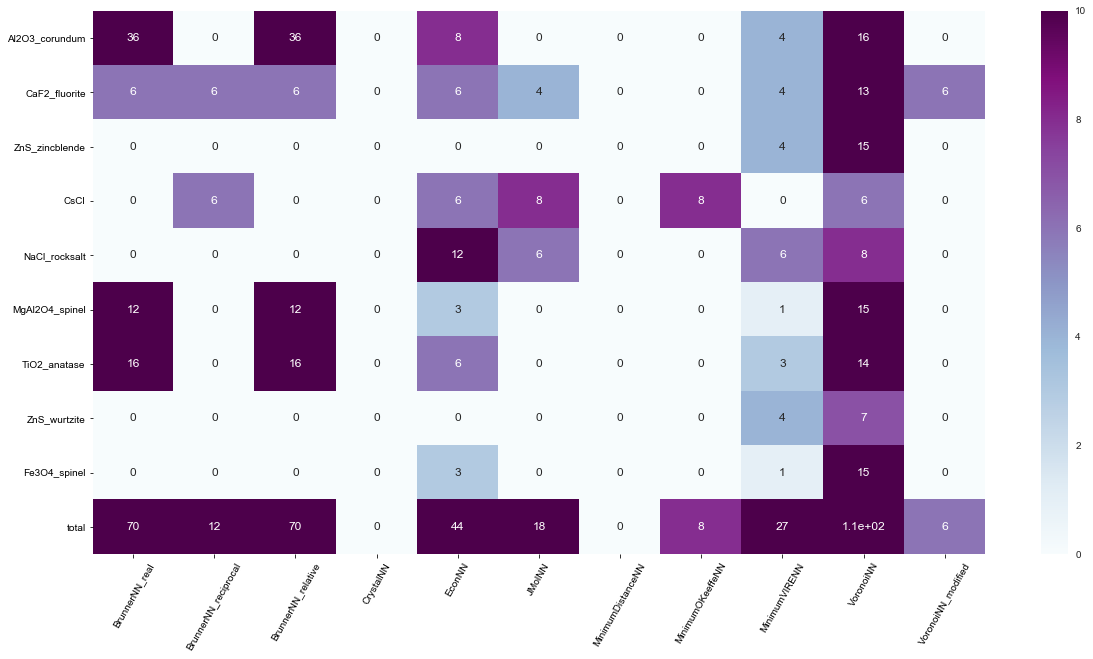

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

sns.set(font='Times New Roman')
sns.set(font_scale=1)

hm = sns.heatmap(final_uw, annot=True, cmap="BuPu", vmax=10)

ax.set_xticklabels(final_uw.columns.tolist(), rotation=60)
ax.set_yticklabels(final_uw.index.tolist())


plt.show()